In [29]:
from data_preporation_farmer_scale import farmer_scale
import geopandas as gpd
import geemap, ee
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
ee.Initialize()
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
years = [f"{i}-10-15" for i in range(2018,2022)]
years = [ [years[i-1], years[i]] for i in range(1,4)]
#url = "https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9F%D1%80%D0%BE%D1%85%D0%BB%D0%B0%D0%B4%D0%BD%D0%BE%D0%BC"
mask = gpd.read_file('vector_data/mask.geojson')
region_of_interest = gpd.read_file('vector_data/fields.geojson')

new_ROI = gpd.GeoDataFrame() #датафрейм куда будутсваливаться уже откластеризованные данные 

for name in region_of_interest.farmer_land_name.unique():
    ROI = region_of_interest[region_of_interest.farmer_land_name == name] #минидатафрейм по хозяйствам
    new_mask = mask[mask.farmer_land_name == name]
    for year in years:
        debug = farmer_scale(year[0] , year[1], new_mask, ROI)
        debug.get_NDVI_by_ROIs()
        debug.get_NDTI()

Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\aleksandr_proj\farmer_scale\anual_data\NDVI\row_data.csv
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\aleksandr_proj\farmer_scale\anual_data\NDTI\row_data.csv
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\aleksandr_proj\farmer_scale\anual_data\minNDTI\row_data.csv
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\aleksandr_proj\farmer_scale\raster_data\minNDTI\Aleksandr_minNDTI_2019.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\aleksandr_proj\farmer_scale\anual_data\NDVI\row_data.csv
file anual_data//NDVI//NDVI_modis.csv alredy exists
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\aleksandr_proj\farmer_scale\anual_data\NDTI\row_data.csv
Gen

In [212]:
masks = gpd.read_file('vector_data/mask.geojson')
ROIs = gpd.read_file('vector_data/fields.geojson')
NDVI_modis = pd.read_csv('anual_data/NDVI/NDVI_modis.csv')
NDTI = pd.read_csv('anual_data/NDTI/NDTI.csv')
minNDTI = pd.read_csv('anual_data/minNDTI/minNDTI.csv')
years = [f"{i}-10-15" for i in range(2018,2022)]
years = [ [years[i-1], years[i]] for i in range(1,4)]
farmlands_names = ROIs.farmer_land_name.unique()


Aleksandr


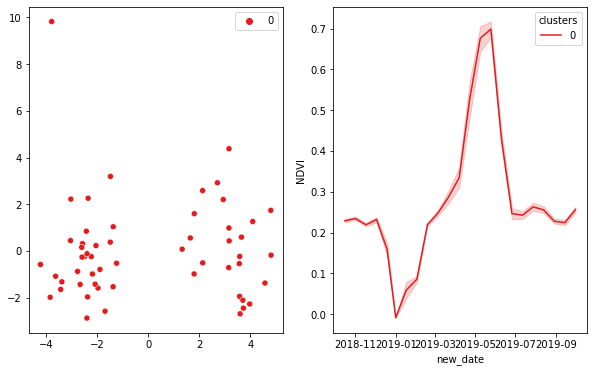

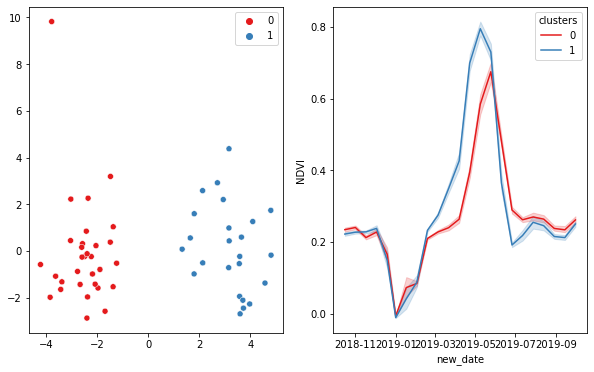

каким культурам соотвествуют кластеры?
{0: 'яровые0', 1: 'яровые1'}


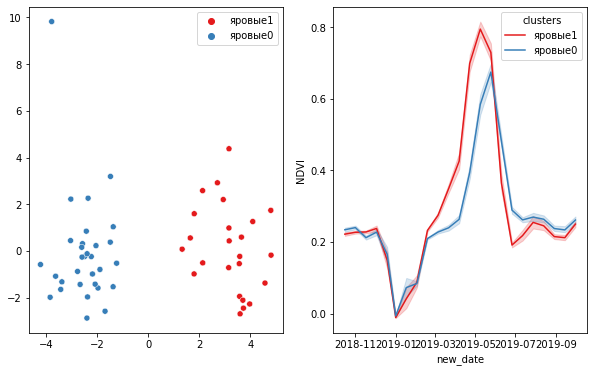

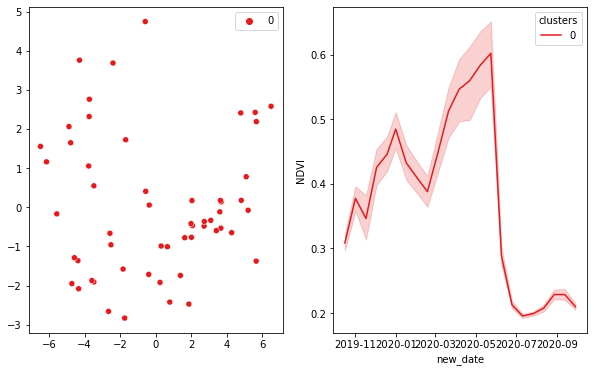

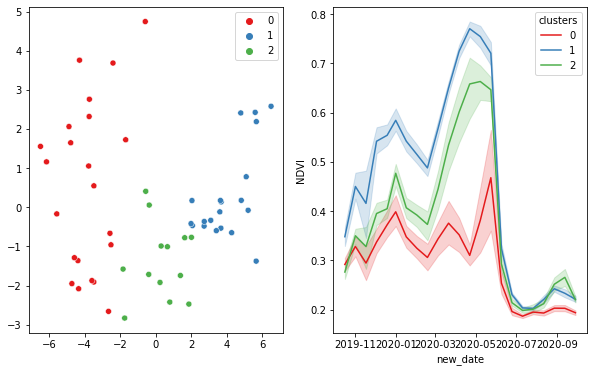

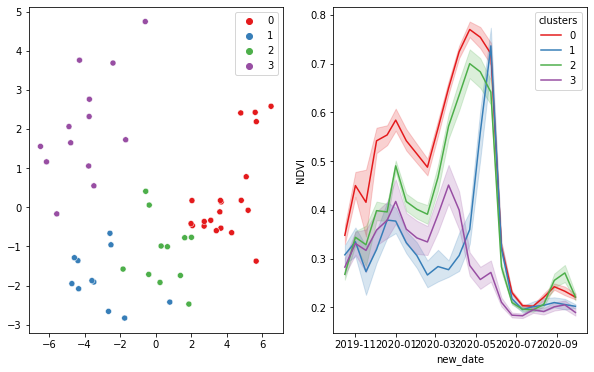

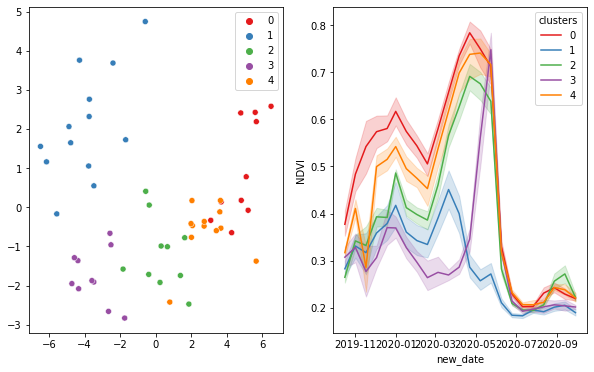

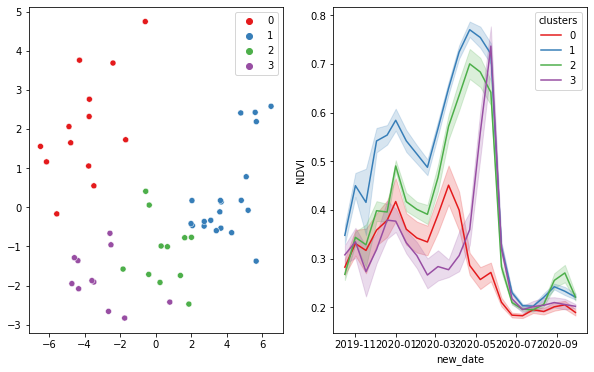

каким культурам соотвествуют кластеры?
{0: 'похоже на пары', 1: 'озимые', 2: 'озимые1', 3: 'непонятная_культура_с_острым_летним_пиком_вегетации'}


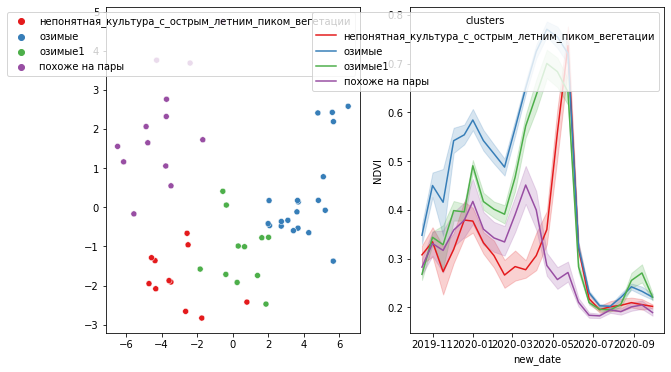

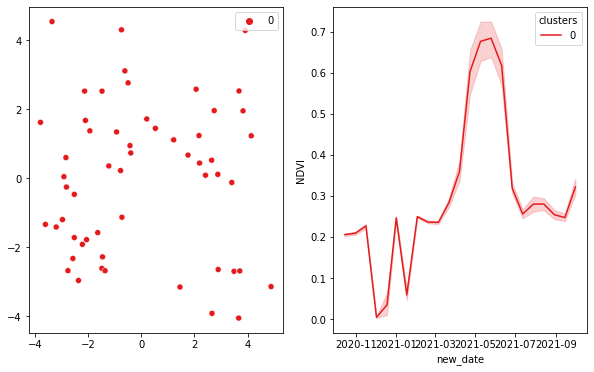

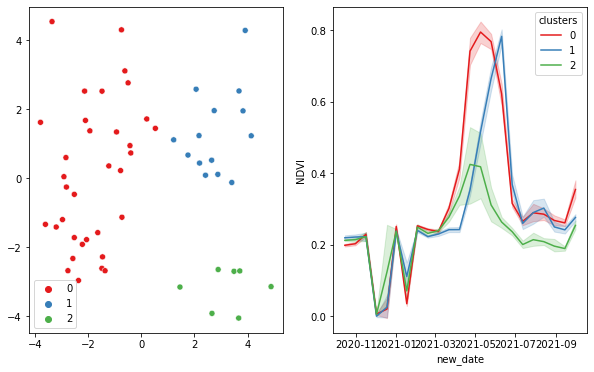

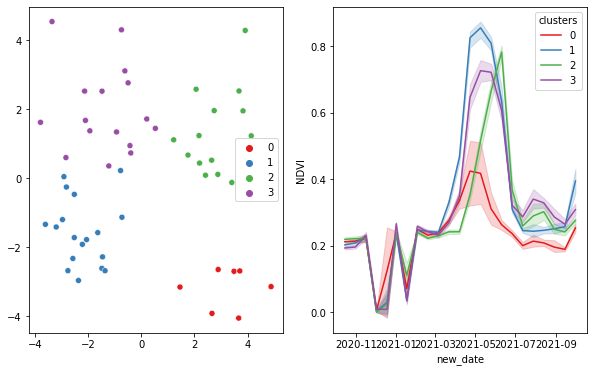

каким культурам соотвествуют кластеры?
{0: 'похоже_на_пары', 1: 'озимые0', 2: 'культура_с_острым_пиком_вегетации', 3: 'озимые1'}


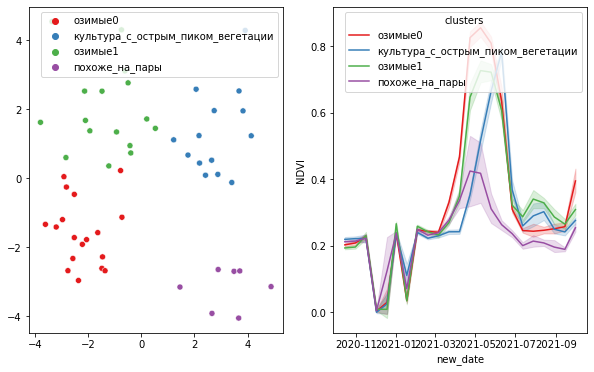

archangelskoe


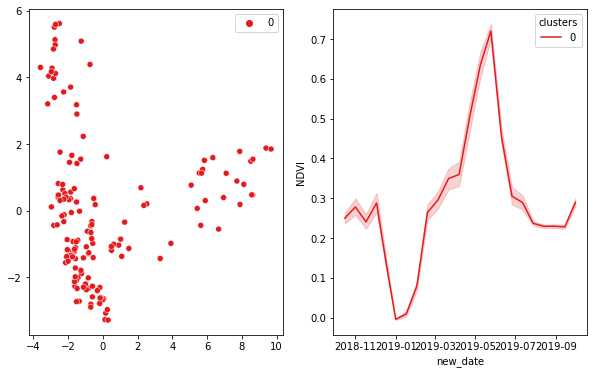

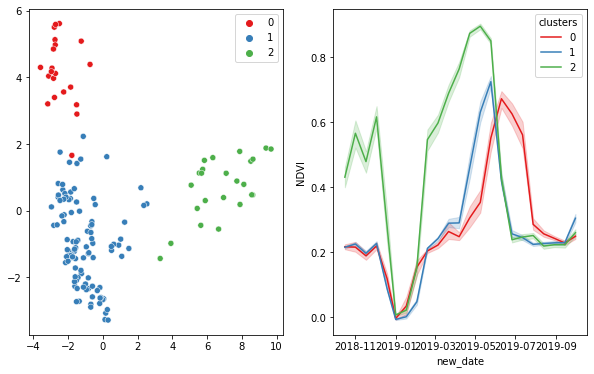

каким культурам соотвествуют кластеры?
{0: 'возможно_пропашные', 1: 'яровые', 2: 'озимые'}


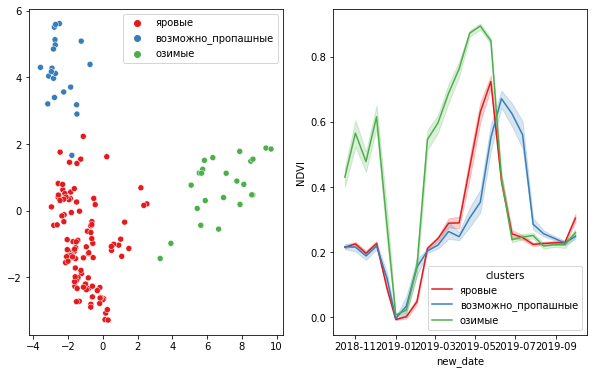

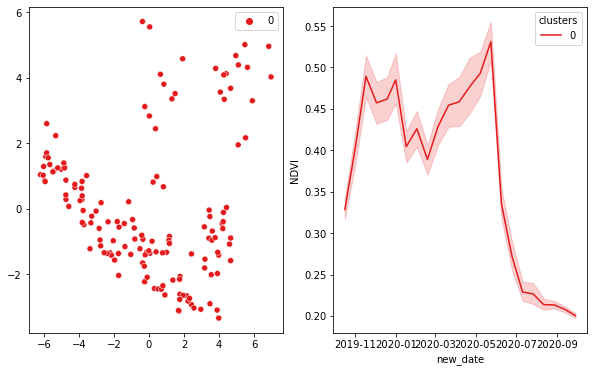

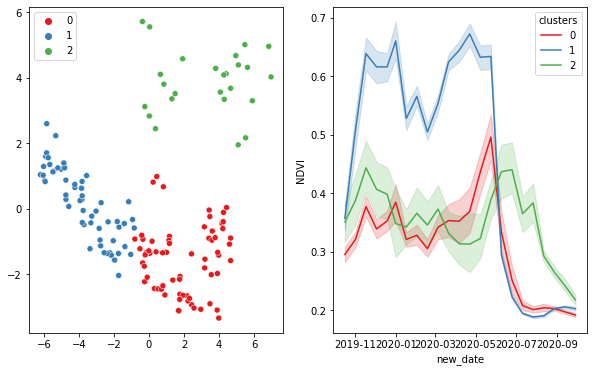

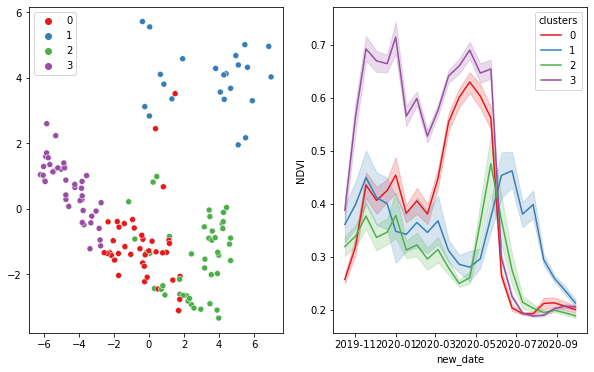

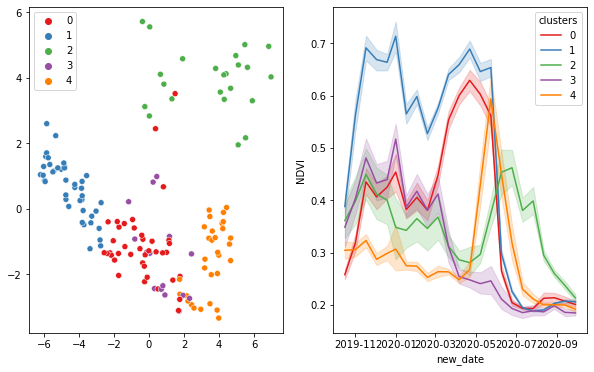

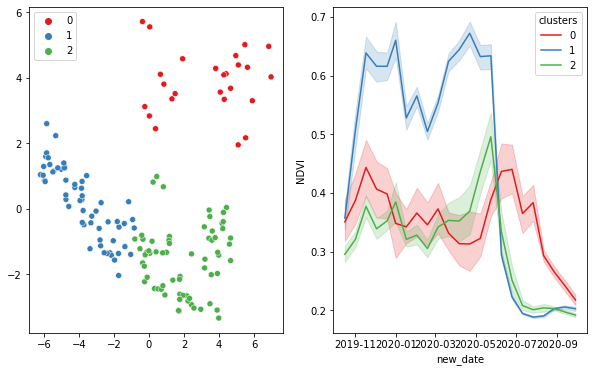

каким культурам соотвествуют кластеры?
{0: 'пропашные?', 1: 'озимые', 2: 'яровые?'}


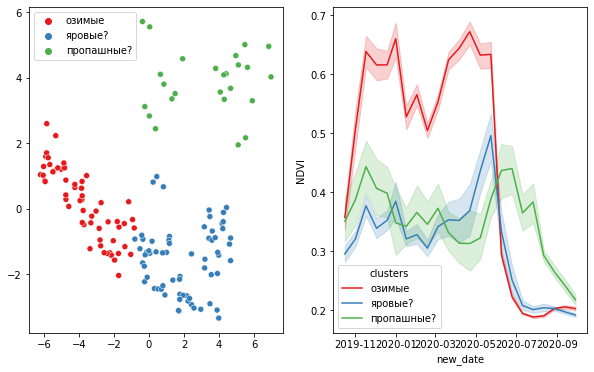

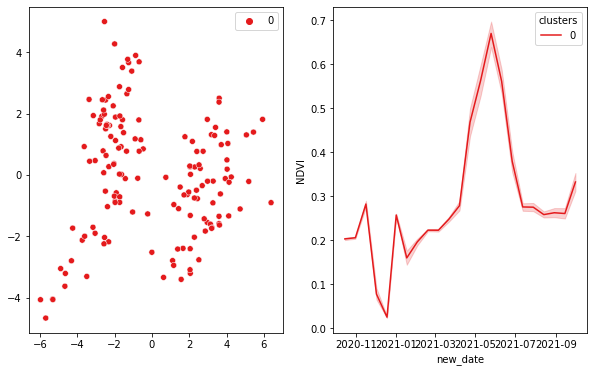

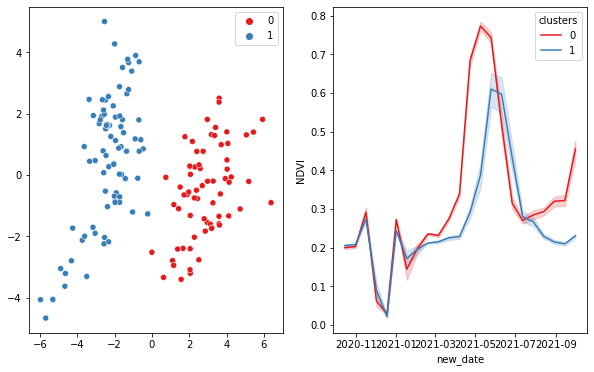

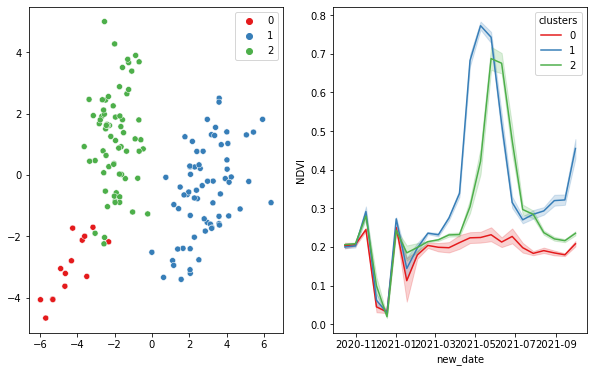

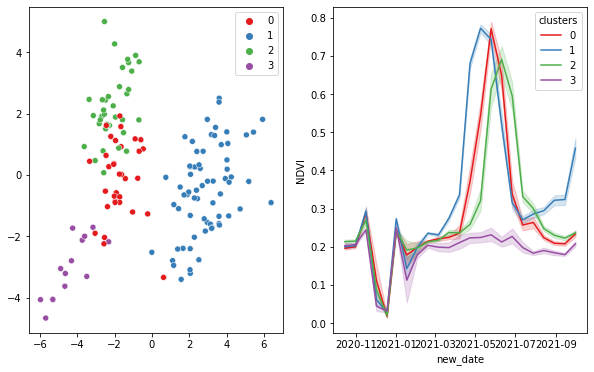

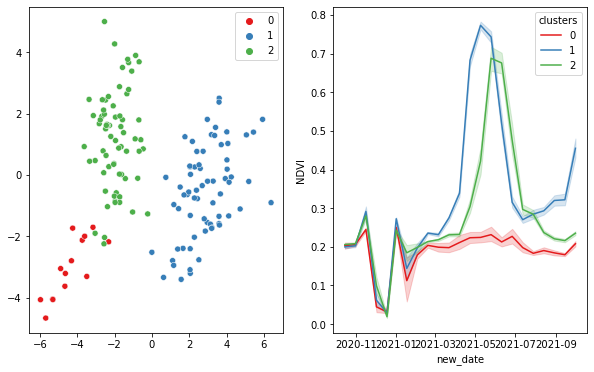

каким культурам соотвествуют кластеры?
{0: 'проданные_участки_на_которых_видимо_пары???', 1: 'озимые', 2: 'яровые'}


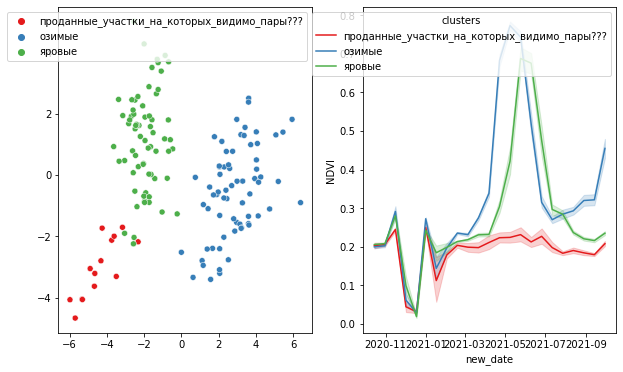

krasnoselskoe


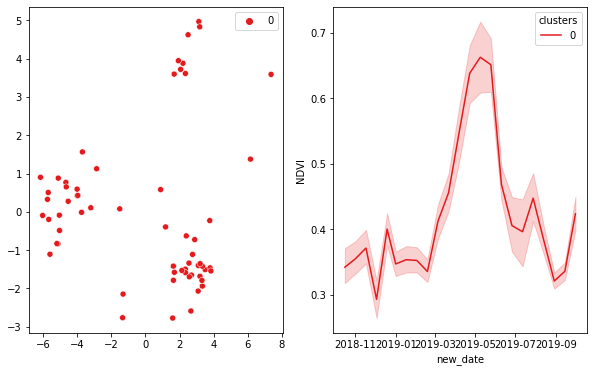

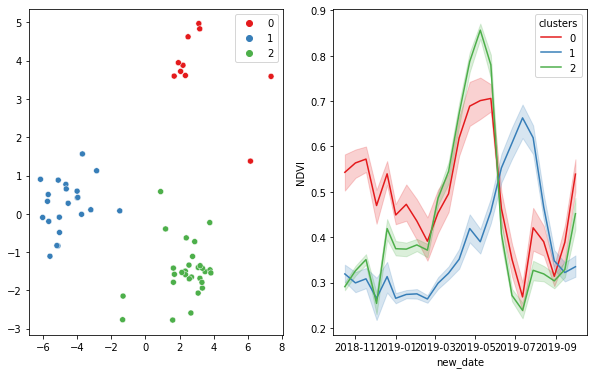

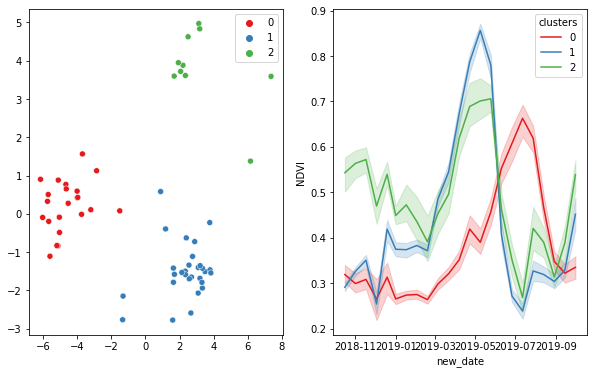

каким культурам соотвествуют кластеры?
{0: 'яровые/пропашные', 1: 'яровые', 2: 'озимые'}


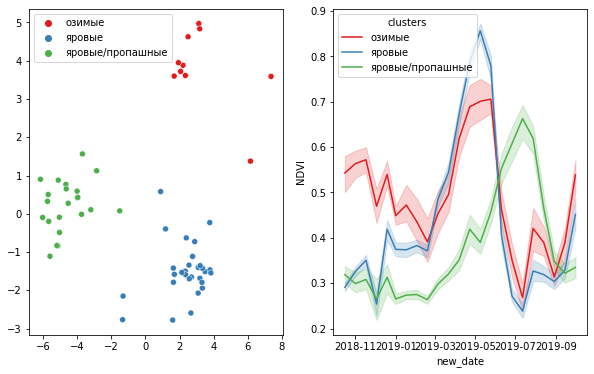

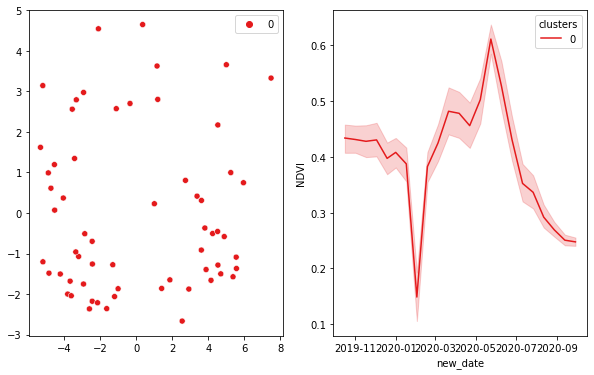

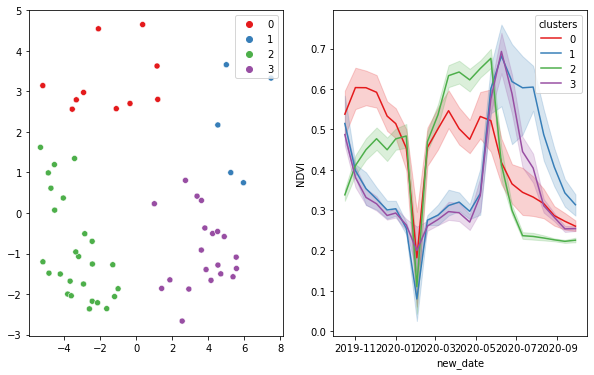

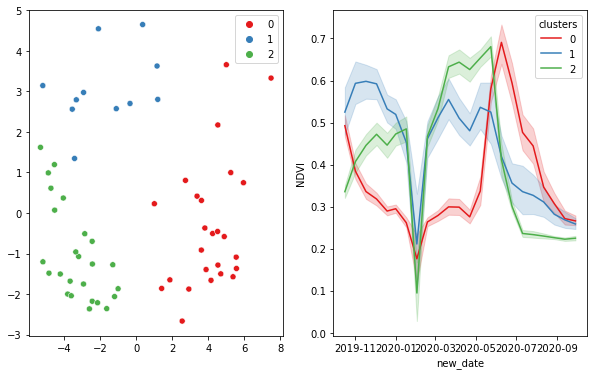

каким культурам соотвествуют кластеры?
{0: 'пропашные/яровые', 1: 'озимые', 2: 'озимые1'}


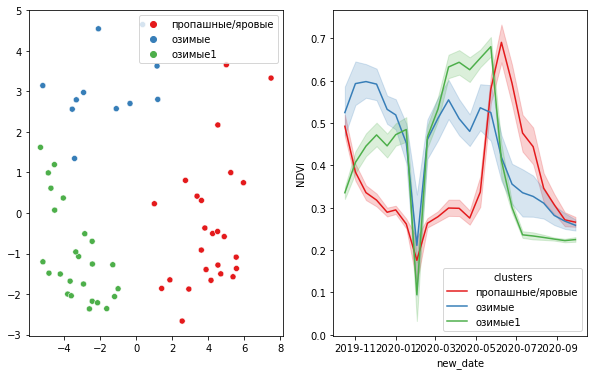

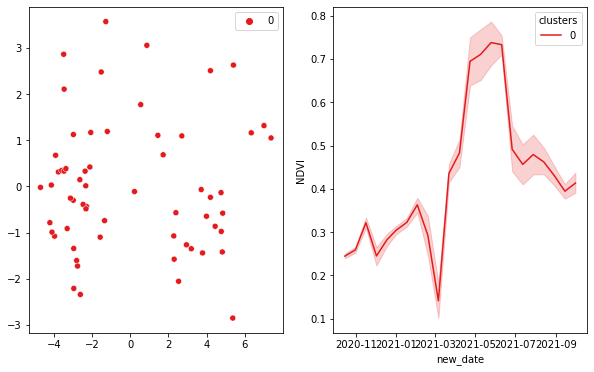

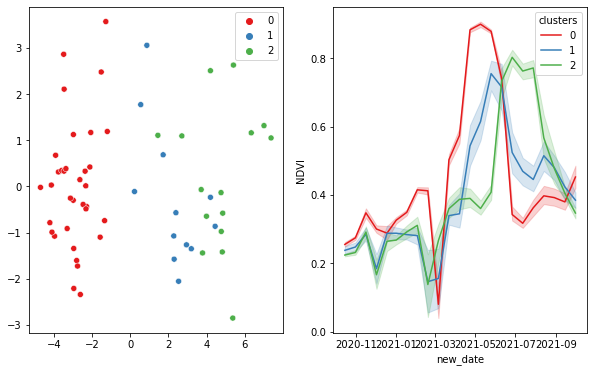

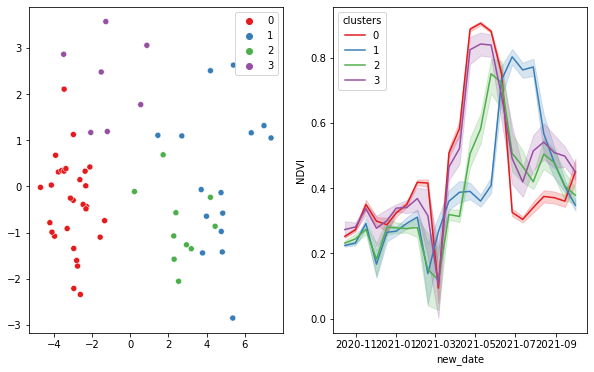

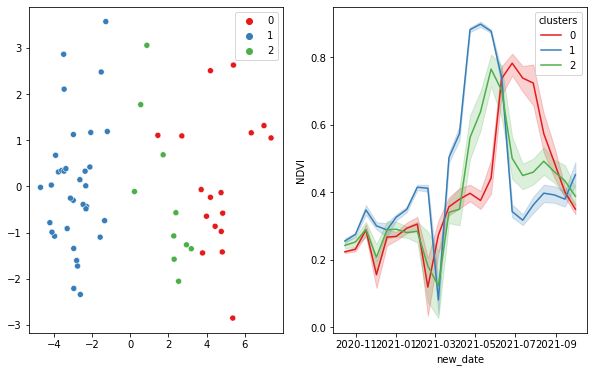

каким культурам соотвествуют кластеры?
{0: 'яровые/пропашные', 1: 'яровые', 2: 'яровые1'}


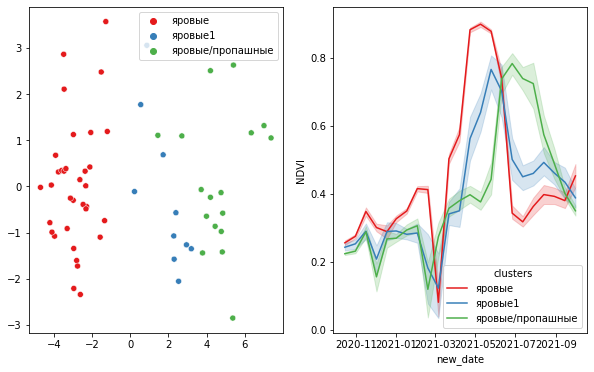

praskoveya


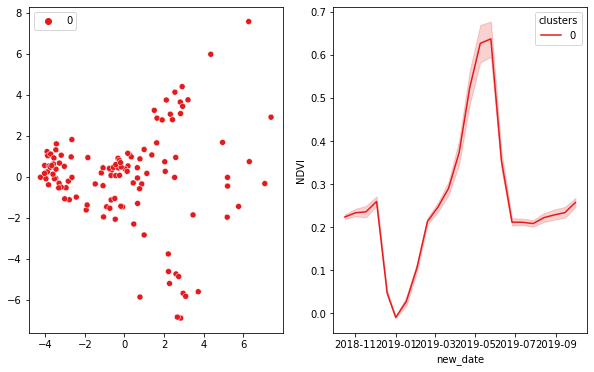

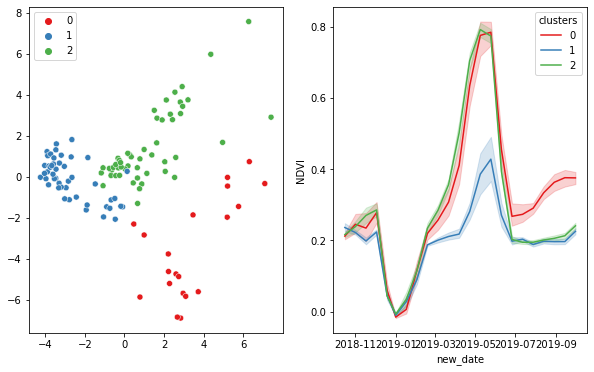

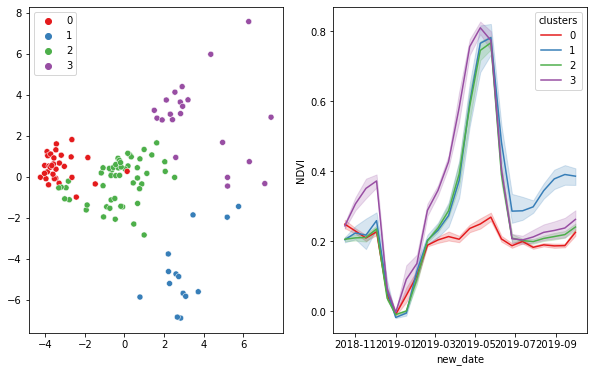

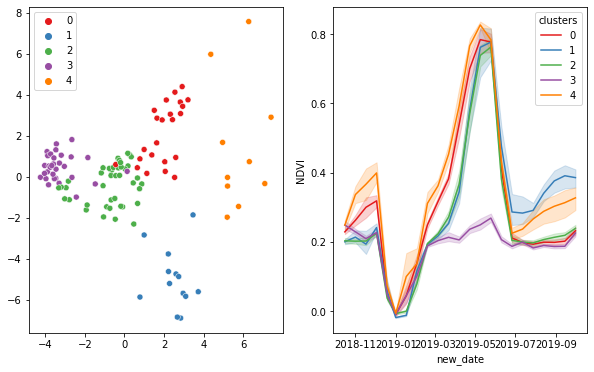

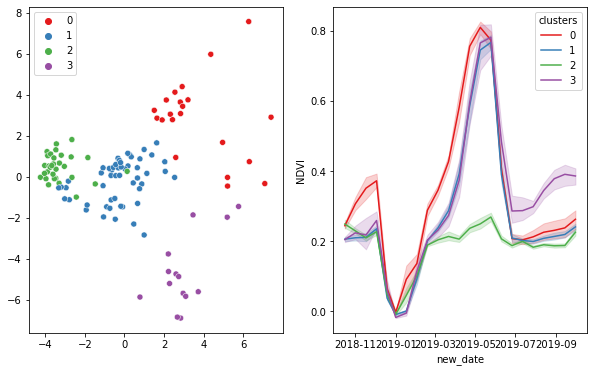

каким культурам соотвествуют кластеры?
{0: 'озимые', 1: 'яровые', 2: 'пары', 3: 'яровые'}


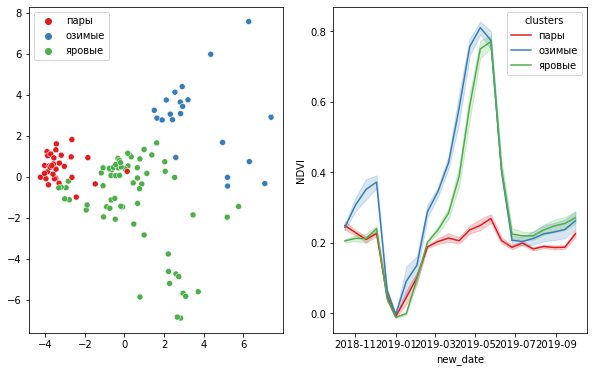

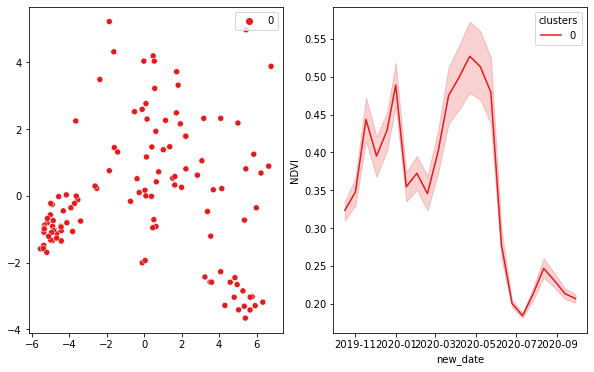

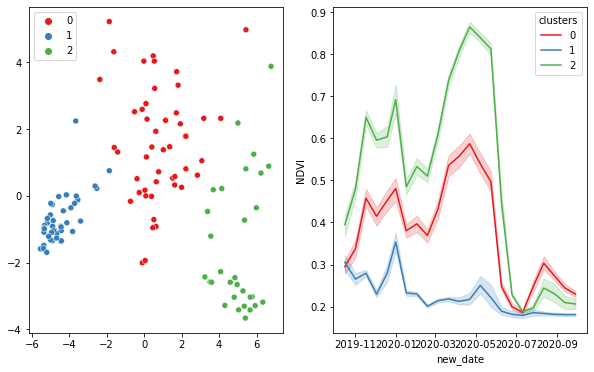

каким культурам соотвествуют кластеры?
{0: 'яровые', 1: 'озимые', 2: 'пары'}


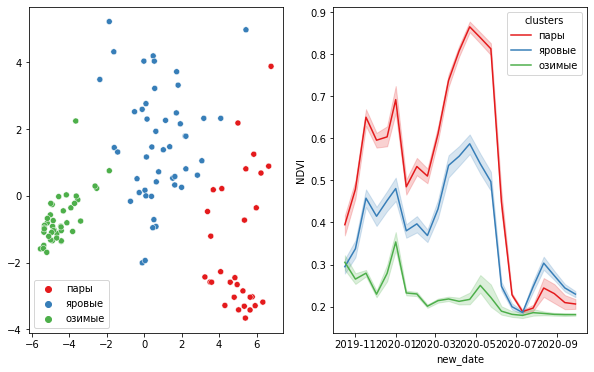

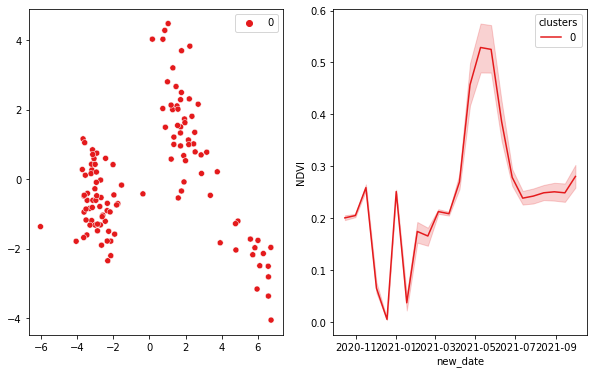

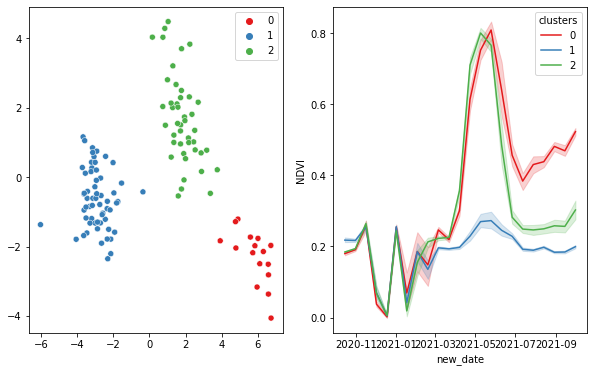

каким культурам соотвествуют кластеры?
{0: 'озимые1', 1: 'пары', 2: 'озимые2'}


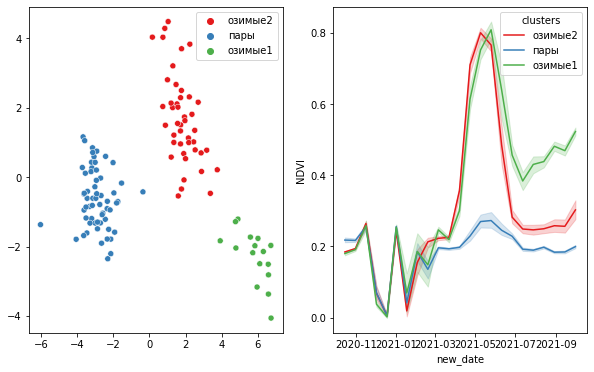

In [213]:
cultures = gpd.GeoDataFrame()
for farm_land in farmlands_names:
    print(farm_land)
    ROI = ROIs[ROIs.farmer_land_name == farm_land]
    df = NDVI_modis[NDVI_modis.farmer_land_name == farm_land]
    for year in years:
        season = year[1].split('-')[0]
        ROI[f'{season}_culture'] = clustering(df,farm_land , year[0], year[1])
    cultures = cultures.append(ROI)



<AxesSubplot:xlabel='farmer_land_name', ylabel='median'>

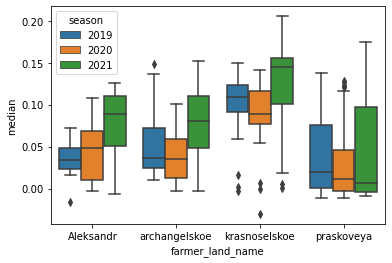

In [152]:
minNDTI = pd.read_csv('anual_data/minNDTI/minNDTI.csv')
minNDTI['year'] = minNDTI['season']
data = gpd.read_file('vector_data/fields_размеченные.geojson')
data = pd.melt(data ,id_vars = ["farmer_land_name"  ,"fieldID"],value_vars = ['2019_culture' ,"2020_culture", "2021_culture"], var_name = 'season',value_name = 'culture'   )

sns.boxplot(data = minNDTI, x = 'farmer_land_name', y = 'median' , hue = 'season')


In [146]:
alexandr = data[data.farmer_land_name == "Aleksandr"].reset_index()
minNDTI_aleksandr = minNDTI[minNDTI.farmer_land_name == "Aleksandr"]['median']
alexandr['minNDTI'] = minNDTI_aleksandr
alexandr


,index,farmer_land_name,fieldID,season,culture,minNDTI
0,0,Aleksandr,0,2019_culture,яровые1,0.048324
1,1,Aleksandr,1,2019_culture,яровые0,0.024956
2,2,Aleksandr,2,2019_culture,яровые0,0.032700
3,3,Aleksandr,3,2019_culture,яровые1,0.016598
4,4,Aleksandr,4,2019_culture,яровые1,0.060984
...,...,...,...,...,...,...
160,822,Aleksandr,50,2021_culture,похоже_на_пары,-0.002957
161,823,Aleksandr,51,2021_culture,похоже_на_пары,-0.004832
162,824,Aleksandr,52,2021_culture,похоже_на_пары,-0.006380
163,825,Aleksandr,53,2021_culture,культура_с_острым_пиком_вегетации,0.081289


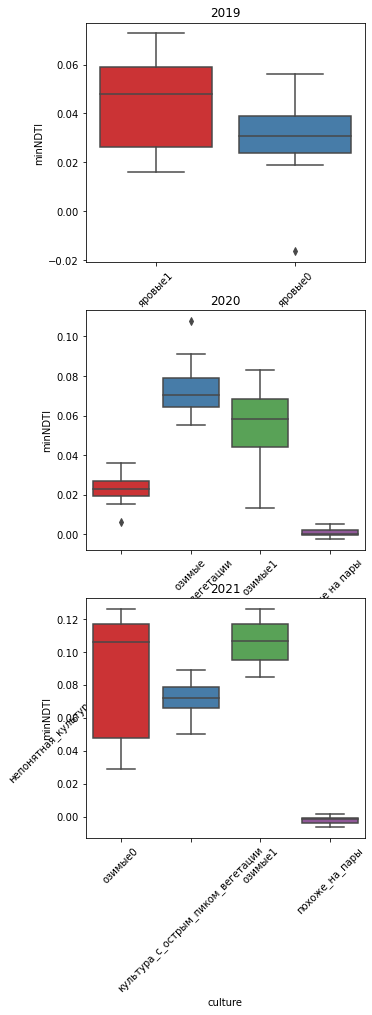

In [174]:
alexandr = data[data.farmer_land_name == "Aleksandr"].reset_index()
minNDTI_aleksandr = minNDTI[minNDTI.farmer_land_name == "Aleksandr"]['median']
alexandr['minNDTI'] = minNDTI_aleksandr
fig, axes = plt.subplots(3, 1, figsize=(5, 15))
plt.xticks(rotation=70)

sns.boxplot(data = alexandr[alexandr.season == "2019_culture"], x = 'culture', y = 'minNDTI' , ax = axes[0], palette= 'Set1').set(title='2019')
axes[0].tick_params(axis='x', rotation=45)



sns.boxplot(data = alexandr[alexandr.season == "2020_culture"], x = 'culture', y = 'minNDTI' ,  ax = axes[1], palette= 'Set1').set(title='2020')
axes[1].tick_params(axis='x', rotation=45)


sns.boxplot(data = alexandr[alexandr.season == "2021_culture"], x = 'culture', y = 'minNDTI' ,  ax = axes[2], palette= 'Set1').set(title='2021')
axes[2].tick_params(axis='x', rotation=45)




In [165]:
archangelskoe = data[data.farmer_land_name == "archangelskoe"].reset_index()
minNDTI_archangelskoe = minNDTI[minNDTI.farmer_land_name == "archangelskoe"]['median']



archangelskoe['minNDTI'] = minNDTI_archangelskoe
#fig, axes = plt.subplots(3, 1, figsize=(5, 15))

#sns.boxplot(data = archangelskoe[archangelskoe.season == "2019_culture"], x = 'culture', y = 'minNDTI' , ax = axes[0], palette= 'Set1')
#sns.boxplot(data = archangelskoe[archangelskoe.season == "2020_culture"], x = 'culture', y = 'minNDTI' ,  ax = axes[1], palette= 'Set1')
#sns.boxplot(data = archangelskoe[archangelskoe.season == "2021_culture"], x = 'culture', y = 'minNDTI' ,  ax = axes[2], palette= 'Set1')

наибольшие отличия от других хозяйств имеет красносельское - хозяйство где у нас самый качественный прямой посев, даже колличественно значения выше, у прасковеи(традиционная технология0 значения ниже всего

In [163]:
archangelskoe

,index,farmer_land_name,fieldID,season,culture,minNDTI
0,55,archangelskoe,55,2019_culture,яровые,NaN
1,56,archangelskoe,56,2019_culture,яровые,NaN
2,57,archangelskoe,57,2019_culture,яровые,NaN
3,58,archangelskoe,58,2019_culture,яровые,NaN
4,59,archangelskoe,59,2019_culture,яровые,NaN
...,...,...,...,...,...,...
445,972,archangelskoe,200,2021_culture,яровые,0.098831
446,973,archangelskoe,201,2021_culture,яровые,0.057063
447,974,archangelskoe,202,2021_culture,яровые,0.045564
448,975,archangelskoe,203,2021_culture,яровые,0.086176


In [38]:
alexandr[alexandr.season == 2020]

,median,farmer_land_name,fieldID,season,culture
55,0.015133,Aleksandr,0,2020,яровые
56,0.006541,Aleksandr,1,2020,яровые
57,0.066140,Aleksandr,2,2020,яровые
58,0.013176,Aleksandr,3,2020,яровые
59,0.028082,Aleksandr,4,2020,яровые
60,0.036256,Aleksandr,5,2020,яровые
61,-0.000515,Aleksandr,6,2020,яровые
62,0.073684,Aleksandr,7,2020,яровые
63,0.047845,Aleksandr,8,2020,яровые
64,0.067430,Aleksandr,9,2020,яровые


<AxesSubplot:xlabel='culture', ylabel='median'>

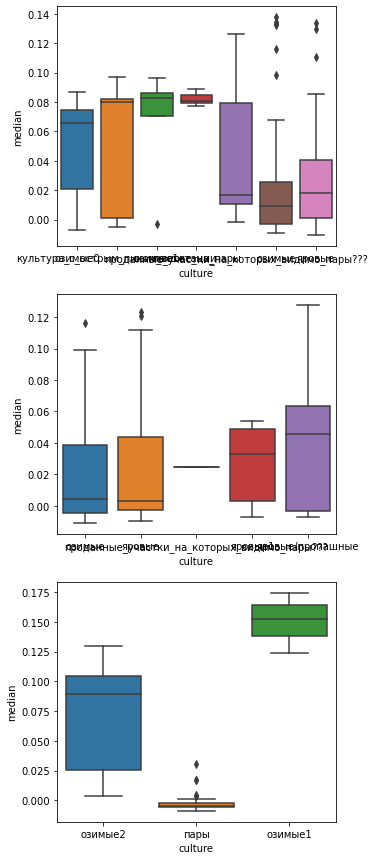

In [35]:
praskoveya = minNDTI[minNDTI.farmer_land_name == "praskoveya"]
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

sns.boxplot(data = praskoveya[praskoveya.season == 2019], x = 'culture', y = 'median' , ax = axes[0])
sns.boxplot(data = praskoveya[praskoveya.season == 2020], x = 'culture', y = 'median' ,  ax = axes[1])
sns.boxplot(data = praskoveya[praskoveya.season == 2021], x = 'culture', y = 'median' ,  ax = axes[2])

In [37]:
praskoveya = minNDTI[minNDTI.farmer_land_name == "praskoveya"]
praskoveya

,median,farmer_land_name,fieldID,season,culture
798,-0.002931,praskoveya,266,2019,озимые0
799,-0.006771,praskoveya,267,2019,озимые0
800,0.020519,praskoveya,268,2019,озимые0
801,-0.004971,praskoveya,269,2019,озимые0
802,0.026863,praskoveya,270,2019,озимые0
...,...,...,...,...,...
1153,-0.004936,praskoveya,381,2021,пары
1154,-0.004916,praskoveya,382,2021,пары
1155,0.106215,praskoveya,383,2021,озимые2
1156,0.094986,praskoveya,384,2021,озимые2


In [41]:
praskoveya[praskoveya.season == 2019].culture.unique()

array(['озимые0', 'культура_с_острым_пиком_вегетации', 'озимые1',
       'похоже_на_пары', 'проданные_участки_на_которых_видимо_пары???',
       'озимые', 'яровые'], dtype=object)